## Objectives
After completing the lab you will be able to:

- Know how to add multiple graphs to the dashboard
- Work with Dash Callbacks to handle multiple outputs
- Estimated time needed: 30 minutes

### Dataset Used
Airline Reporting Carrier On-Time Performance dataset from Data Asset eXchange

# Let's start creating dash application
## Theme
Analyze flight delays in a dashboard.

## Dashboard Components
- Monthly average carrier delay by reporting airline for the given year.
- Monthly average weather delay by reporting airline for the given year.
- Monthly average national air system delay by reporting airline for the given year.
- Monthly average security delay by reporting airline for the given year.
- Monthly average late aircraft delay by reporting airline for the given year.
NOTE: Year range should be between 2010 and 2020

### Expected Output
Below is the expected result from the lab. Our dashboard application consists of three components:

- Title of the application
- Component to enter input year
- 5 Charts conveying the different types of flight delay. Chart section is divided into three segments.
    - Carrier and Weather delay in the first segment
    - National air system and Security delay in the second segment
    - Late aircraft delay in the third segment
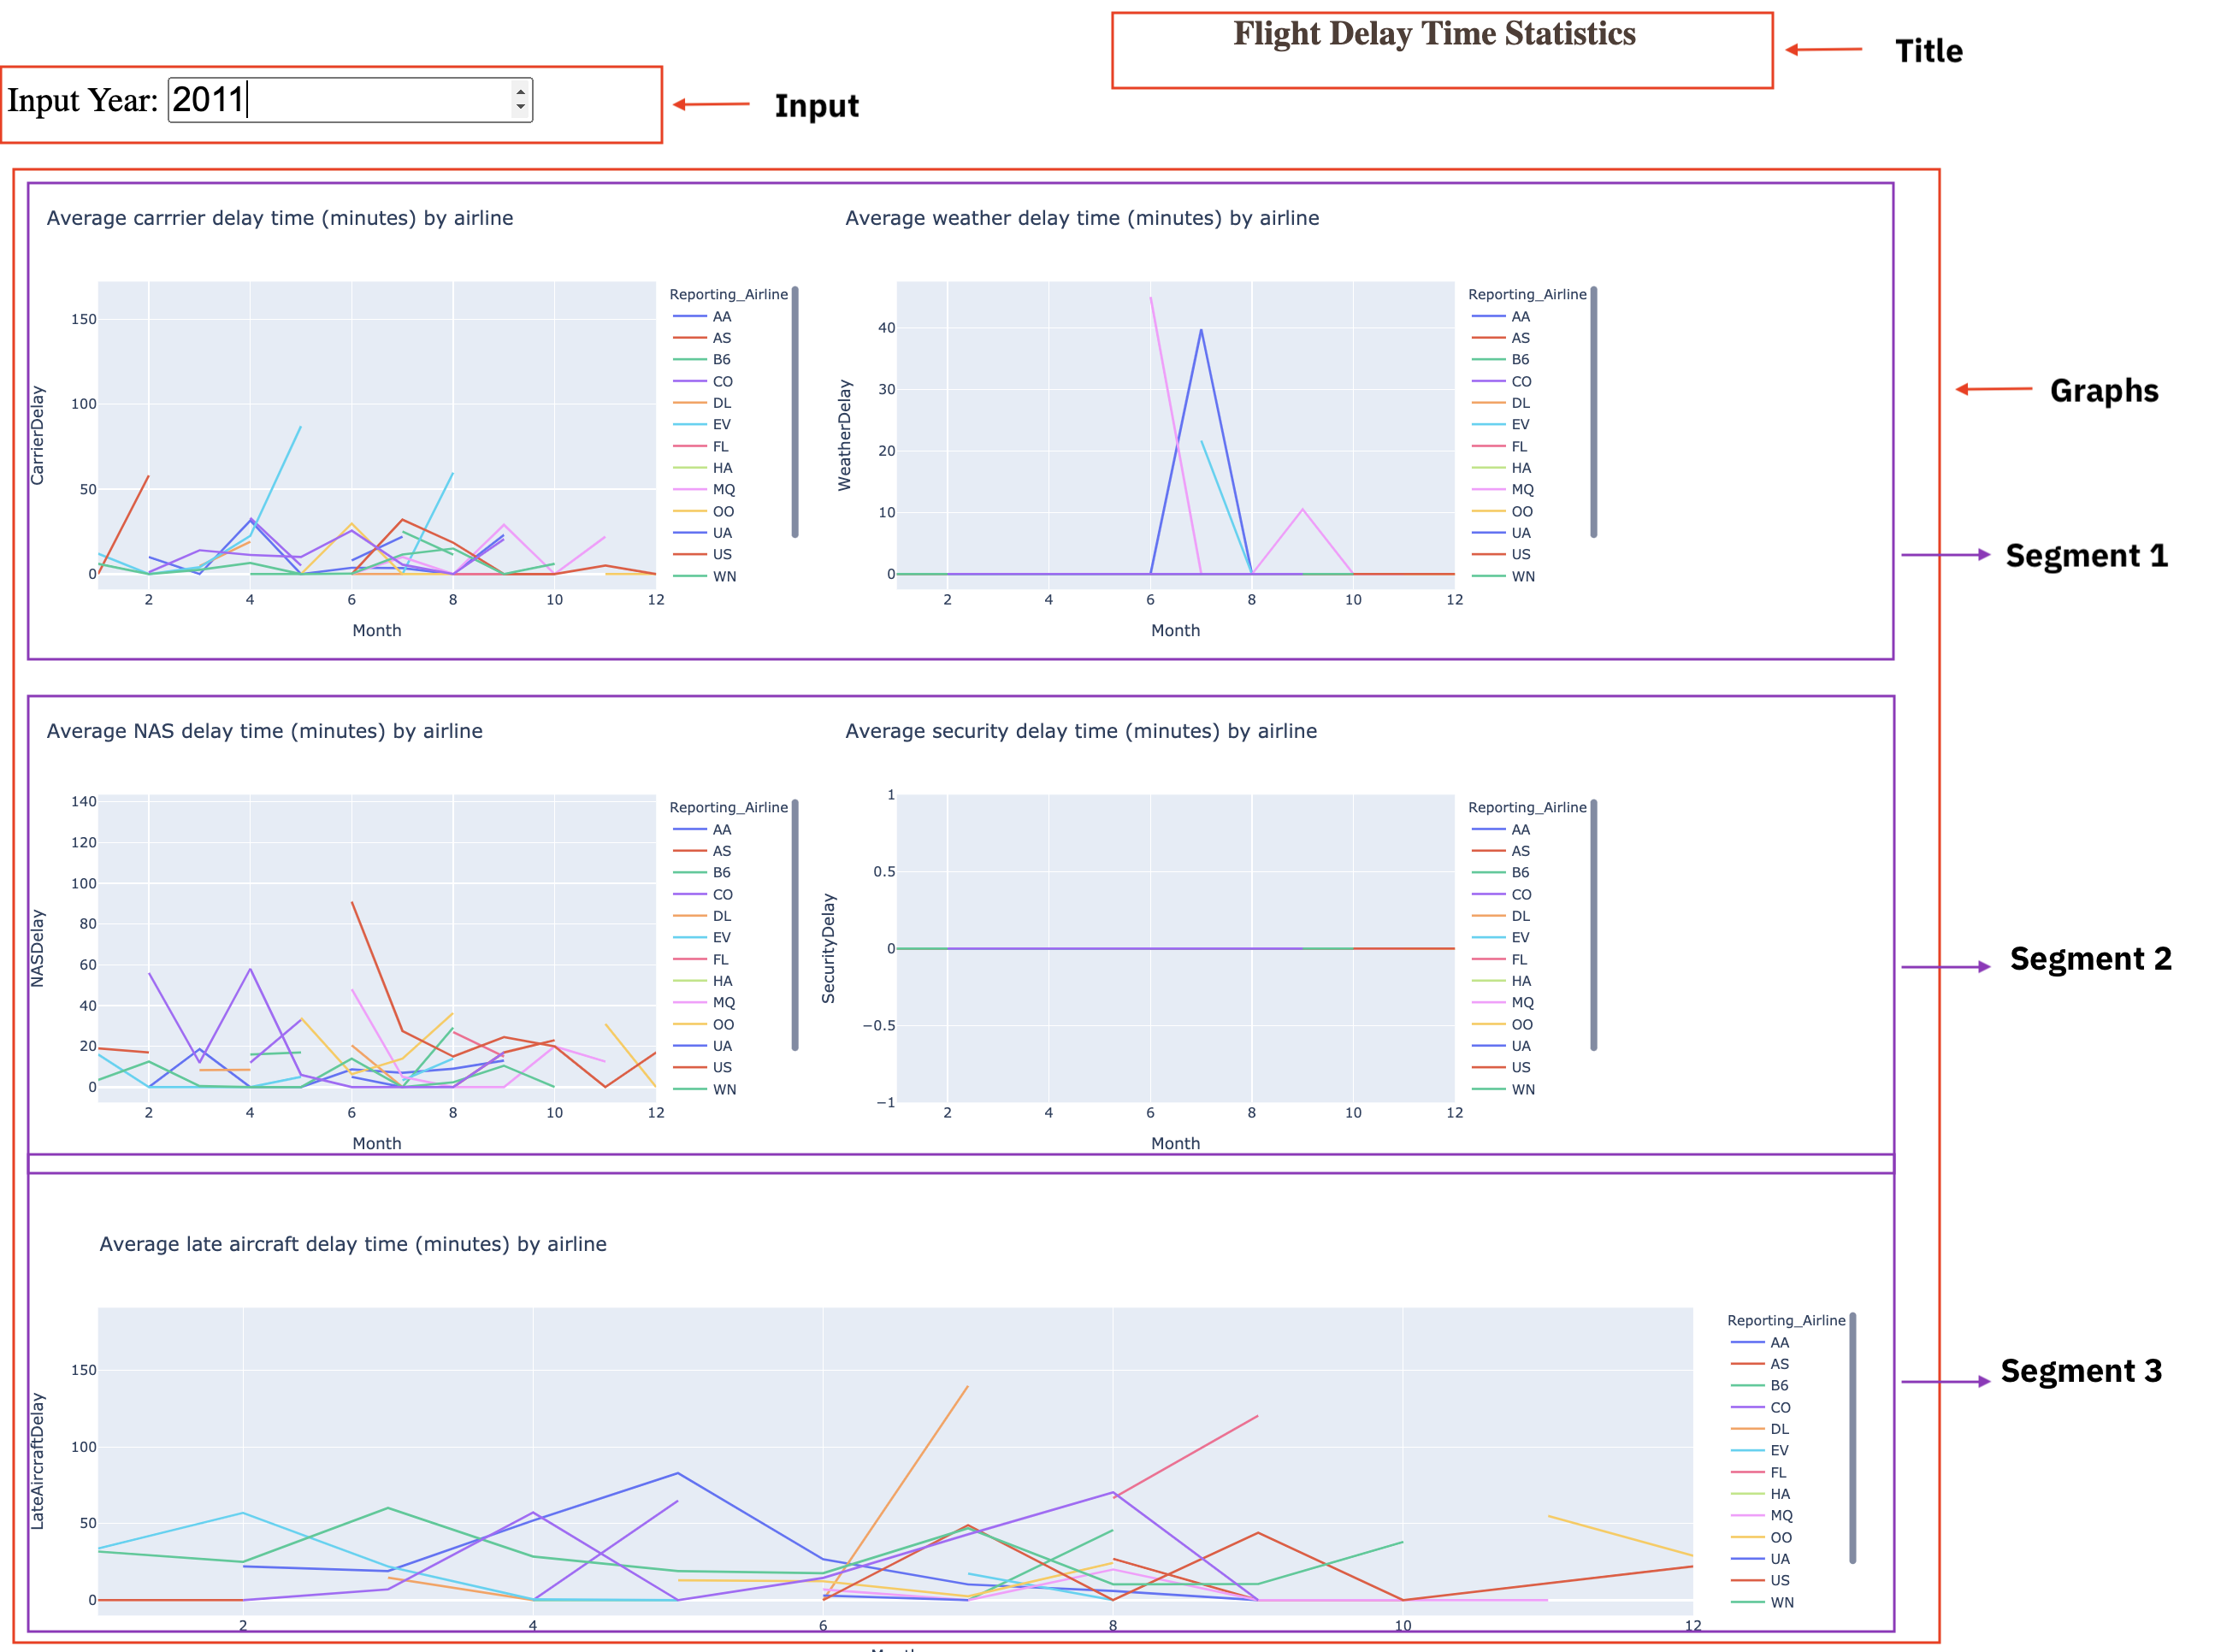

### To do:
- Design layout for the application.
- Create a callback function. Add callback decorator, define inputs and outputs.
- Review the helper function that performs computation on the provided inputs.
- Create 5 line graphs.
- Run the application.

In [2]:
# Import required packages
import pandas as pd
import plotly.express as px
from dash import Dash, html, dcc, callback, Output, Input

In [ ]:
# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

In [ ]:
airline_data.head()

In [ ]:
# Create a dash application
app = Dash(__name__)

# Build dash app layout
app.layout = html.Div(children=[html.H1("Flight Delay Time Statistics", 
                                        style = {'textAlign':'center', 'color':'503D36','font-size':30}
                                       ),
                                html.Div(["Input Year: ", dcc.Input(id='input-year', 
                                                                    value = '2010', 
                                                                    type = 'number', 
                                                                    style = {'height':'35px',"font-size": 30})],
                                style={'font-size': 30}),
                                html.Br(),
                                html.Br(), 
                                html.Div([
                                        html.Div(dcc.Graph(id='carrier-plot')),
                                        html.Div(dcc.Graph(id='weather-plot'))
                                ], style={'display': 'flex'}), 
    
                                html.Div([
                                        html.Div(dcc.Graph(id='nas-plot')),
                                        html.Div(dcc.Graph(id='security-plot'))
                                ], style={'display': 'flex'}), 
                                
                                html.Div(dcc.Graph(id='late-plot'), style={'width':'65%'})
                                ])

In [ ]:
""" Compute_info function description
This function takes in airline data and selected year as an input and performs computation for creating charts and plots.
Arguments:
    airline_data: Input airline data.
    entered_year: Input year for which computation needs to be performed.
    
Returns:
    Computed average dataframes for carrier delay, weather delay, NAS delay, security delay, and late aircraft delay.
"""
def compute_info(airline_data, entered_year):
    # Select data
    df =  airline_data[airline_data['Year']==int(entered_year)]
    # Compute delay averages
    avg_car = df.groupby(['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
    avg_weather = df.groupby(['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
    avg_NAS = df.groupby(['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
    avg_sec = df.groupby(['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
    avg_late = df.groupby(['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()
    return avg_car, avg_weather, avg_NAS, avg_sec, avg_late

In [ ]:
"""Callback Function
Function that returns fugures using the provided input year.
Arguments:
    entered_year: Input year provided by the user.
    
Returns:
    List of figures computed using the provided helper function `compute_info`.
"""

# Callback decorator
@app.callback(
    [
        Output(component_id='carrier-plot', component_property='figure'),
        Output(component_id='weather-plot', component_property='figure'),
        Output(component_id='nas-plot', component_property='figure'),
        Output(component_id='security-plot', component_property='figure'),
        Output(component_id='late-plot', component_property='figure'),
    ],
    Input(component_id='my-input', component_property='value'))

# Computation to callback function and return graph
def get_graph(entered_year):
    
    # Compute required information for creating graph from the data
    avg_car, avg_weather, avg_NAS, avg_sec, avg_late = compute_info(airline_data, entered_year)
            
    # Line plot for carrier delay
    carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average carrier delay time (minutes) by airline')
    # Line plot for weather delay
    weather_fig = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average weather delay time (minutes) by airline')
    # Line plot for nas delay
    nas_fig = px.line(avg_NAS, x='Month', y='NASDelay', color='Reporting_Airline', title='Average NAS delay time (minutes) by airline')
    # Line plot for security delay
    sec_fig = px.line(avg_sec, x='Month', y='SecurityDelay', color='Reporting_Airline', title='Average security delay time (minutes) by airline')
    # Line plot for late aircraft delay
    late_fig = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline', title='Average late aircraft delay time (minutes) by airline')
            
    return[carrier_fig, weather_fig, nas_fig, sec_fig, late_fig]
# Run the app
if __name__ == '__main__':
    app.run_server()

In [3]:
# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

# Select data
df =  airline_data[airline_data['Year']==int(2012)]
# Compute delay averages
avg_car = df.groupby(['Month','Reporting_Airline'])['CarrierDelay'].mean().reset_index()
avg_weather = df.groupby(['Month','Reporting_Airline'])['WeatherDelay'].mean().reset_index()
avg_NAS = df.groupby(['Month','Reporting_Airline'])['NASDelay'].mean().reset_index()
avg_sec = df.groupby(['Month','Reporting_Airline'])['SecurityDelay'].mean().reset_index()
avg_late = df.groupby(['Month','Reporting_Airline'])['LateAircraftDelay'].mean().reset_index()

# Line plot for carrier delay
carrier_fig = px.line(avg_car, x='Month', y='CarrierDelay', color='Reporting_Airline', title='Average carrier delay time (minutes) by airline')
# Line plot for weather delay
weather_fig = px.line(avg_weather, x='Month', y='WeatherDelay', color='Reporting_Airline', title='Average weather delay time (minutes) by airline')
# Line plot for nas delay
nas_fig = px.line(avg_NAS, x='Month', y='NASDelay', color='Reporting_Airline', title='Average NAS delay time (minutes) by airline')
# Line plot for security delay
sec_fig = px.line(avg_sec, x='Month', y='SecurityDelay', color='Reporting_Airline', title='Average security delay time (minutes) by airline')
# Line plot for late aircraft delay
late_fig = px.line(avg_late, x='Month', y='LateAircraftDelay', color='Reporting_Airline', title='Average late aircraft delay time (minutes) by airline')